# Example for a three link revolute robot

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Create a path for the robot to follow

In [2]:
from ppr.path import TrajectoryPt, TolerancedNumber

In [3]:
# create tolerances for x-position and orientation
dx    = TolerancedNumber(1, 0.9, 1.1, samples=3)
angle = TolerancedNumber(0.0, -0.5, 0.5, samples=5)

# create a list with path points
path1 = []
n_path = 12
for i in range(n_path):
    yi = 0.7 + i * 0.6 / n_path
    path1.append(TrajectoryPt([dx, yi, angle]))

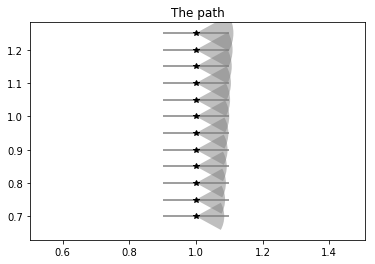

In [4]:
fig1, ax1 = plt.subplots()
plt.title("The path")
ax1.axis('equal')
for tp in path1: tp.plot(ax1)
plt.show()

## Create a robot to follow the path

In [5]:
from ppr.robot import Robot_3R

In [6]:
# create a robot with link lengths 1, 1 and 0.5
robot1 = Robot_3R([1, 1, 0.5])

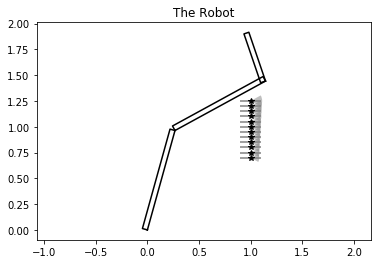

In [7]:
fig2, ax2 = plt.subplots()
plt.title("The Robot")
ax2.axis('equal')
robot1.plot(ax2, [1.3, -0.8, 1.4], 'k')
for tp in path1: tp.plot(ax2)
plt.show()

## Create rectangle collision objects around the robot

In [8]:
from ppr.geometry import Rectangle

In [9]:
sc1 = [Rectangle(0.2, 0.4, 0.1, 0.2, -0.3),
       Rectangle(0.2, 0.8, 0.1, 0.5, 0.2),
       Rectangle(0.5, 1.3, 0.2, 0.3, -0.1)]

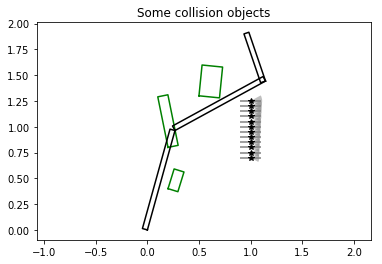

In [10]:
fig3, ax3 = plt.subplots()
plt.title("Some collision objects")
ax3.axis('equal')
for r in sc1: r.plot(ax3, 'g')
for tp in path1: tp.plot(ax3)
robot1.plot(ax3, [1.3, -0.8, 1.4], 'k')
plt.show()

# Sampling based motion planning

## Now discretise the problem
The tolerenced trajectory points are converted to a list of poses.
Then for all these poses the inverse kinematics are solved.

In [11]:
from ppr.path import cart_to_joint
path_js = cart_to_joint(robot1, path1, check_collision=True, scene=sc1)

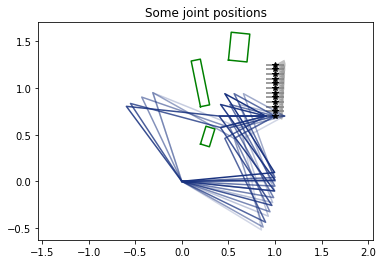

In [12]:
# plot the different joint solution for the first trajectory point
fig4, ax4 = plt.subplots()
plt.title("Some joint positions")
ax4.axis('equal')
robot1.plot_path_kinematics(ax4, path_js[0])
for r in sc1: r.plot(ax4, 'g')
for tp in path1: tp.plot(ax4)
plt.show()

## Graph search

In [13]:
from ppr.path import get_shortest_path

In [14]:
sol = get_shortest_path(path_js)
print(sol['success'])

converting type of Q
[0 1 1 2 2 2 3 2 2 1 1 0]
True


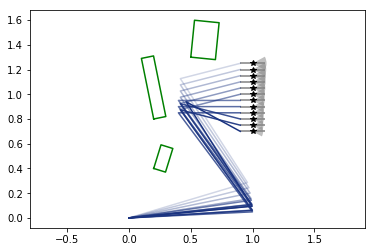

In [15]:
fig5, ax5 = plt.subplots()
ax5.axis('equal')
robot1.plot_path_kinematics(ax5, sol['path'])
for r in sc1: r.plot(ax5, 'g')
for tp in path1: tp.plot(ax5)
plt.show()

# Optimisation based path following

In [16]:
from ppr.optim import get_optimal_trajectory

In [17]:
# use the solution of the sampling based method as initial value
q_init = sol['path']
# dymanics are not implemented at the moment, dq and dqq are quit useless for now
q_opt, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init)

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 0.9055351457500107
            Iterations: 74
            Function evaluations: 2900
            Gradient evaluations: 70


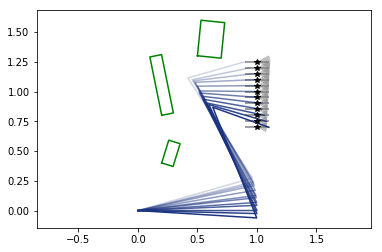

In [18]:
fig6, ax6 = plt.subplots()
ax6.axis('equal')
robot1.plot_path_kinematics(ax6, q_opt)
for r in sc1: r.plot(ax6, 'g')
for tp in path1: tp.plot(ax6)
plt.show()

We can also choose to stay close to the nominal value of the trajectory points

In [19]:
weights = w={'joint_motion': 0.0, 'path_error': 1.0, 'torque': 0.0}
q_opt2, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, w=weights)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 3.304098610241336e-07
            Iterations: 31
            Function evaluations: 1179
            Gradient evaluations: 31


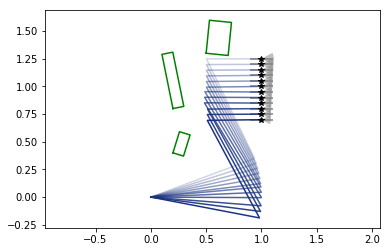

In [20]:
fig7, ax7 = plt.subplots()
ax7.axis('equal')
robot1.plot_path_kinematics(ax7, q_opt2)
for r in sc1: r.plot(ax7, 'g')
for tp in path1: tp.plot(ax7)
plt.show()

In [21]:
weights = w={'joint_motion': 0.0, 'path_error': 1.0, 'torque': 0.0}
q_opt2, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init,
                                                 check_collision=True, scene=sc1,
                                                 w=weights)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1.974442584120712e-05
            Iterations: 31
            Function evaluations: 1197
            Gradient evaluations: 31


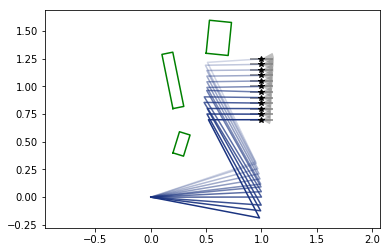

In [24]:
fig7, ax7 = plt.subplots()
ax7.axis('equal')
robot1.plot_path_kinematics(ax7, q_opt2)
for r in sc1: r.plot(ax7, 'g')
for tp in path1: tp.plot(ax7)
plt.show()

## Untested minimal torque objective

In [22]:
robot1.set_link_inertia([1, 1, 1], [0.5, 0.5, 0.25], [0.05, 0.05, 0.05])
weights = w={'joint_motion': 0.0, 'path_error': 0.0, 'torque': 1.0}
q_opt3, dq_opt, ddq_opt = get_optimal_trajectory(robot1, path1, q_init, w=weights)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.181791904677063e-05
            Iterations: 41
            Function evaluations: 1616
            Gradient evaluations: 41


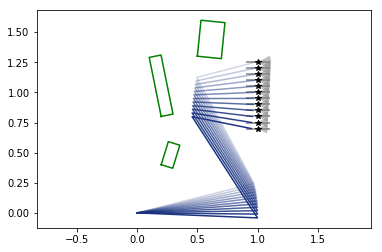

In [23]:
fig8, ax8 = plt.subplots()
ax8.axis('equal')
robot1.plot_path_kinematics(ax8, q_opt3)
for r in sc1: r.plot(ax8, 'g')
for tp in path1: tp.plot(ax8)
plt.show()